In [3]:
#과제 8
#/content/iris (1).data
import torch
import requests
import matplotlib.pyplot as plt

iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)
open('iris (1).data', 'wb').write(r.content)
vectors = []
answers = []
with open('iris (1).data', 'r') as f:
    for line in f:
        line = line.strip()
        if len(line) != 0:
            items = line.split(",")
            vectors.append([float(x) for x in items[:4]])
            answers.append(items[4])
species = {a: i for i, a in enumerate(set(answers))}

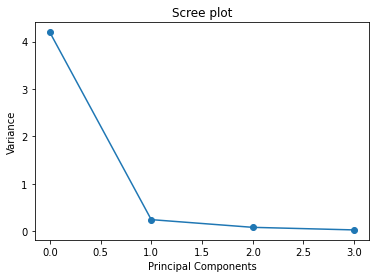

In [6]:
#Tensor 로 변환, 중심 옮기기
X = torch.FloatTensor(vectors)
Z = (X-torch.mean(X, axis=0))

#분산을 최대로 하는 w벡터 찾기 함수
def findPC(Z):
    w = torch.randn(Z.shape[1])
    w = w/(torch.dot(w,w)**0.5)
    lr = 0.1
    for epoch in range(1001):
        w.requires_grad_(True)
        variance = torch.mean(torch.sum(Z * w, dim=1) ** 2)

        variance.backward()
        with torch.no_grad():
            w = w + lr * w.grad
            w = w/(torch.dot(w,w)**0.5)
    return w, variance.item()
# 순서대로 주성분 찾기
def PCA(Z, n):
    W, V = [], []
    for _ in range(n):
        w, v = findPC(Z)
        W.append(w)
        V.append(v)
        Z = Z - (Z @ w.view(-1,1)) * w
    return W, V


plt.title("Scree plot")
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.plot(range(4), V, "o-")
plt.show()

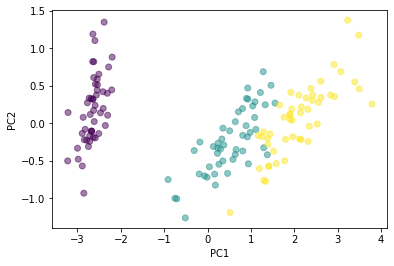

In [13]:
#transform()
def transform(Z, W):
    return Z @ torch.stack(W).T

#PCA를 구하고, 데이터 변환
W, V = PCA(Z, 4)
K = transform(Z, W)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(K[:,0], K[:,1], c=[species[a] for a in answers], alpha=0.5)
plt.show()